In [1]:
# Robosuite HDF5 Dataset Explorer
import h5py
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# Set this to your HDF5 file path
file_path = "/home/dhanush/gaze_project/gaze_rl/data/lift_dual/nov2024/demo_1_proc_images.hdf5"

### Reading HDF5 files

In [2]:
# Cell 1: Basic file structure exploration

with h5py.File(file_path, "r") as f:
    print("=== HDF5 FILE STRUCTURE ===")

    # Print top-level groups
    print("Top-level groups/datasets:")
    for key in f.keys():
        print(f"  - {key}")

    # Print metadata from 'data' group
    if "data" in f:
        print("\nDataset metadata:")
        data_group = f["data"]

        # Print attributes
        for attr_name, attr_value in data_group.attrs.items():
            if attr_name == "env_args":
                try:
                    env_args = json.loads(attr_value)
                    print(f"  - Environment: {env_args.get('env_name', 'Unknown')}")
                    print(
                        f"  - Environment type: {env_args.get('env_type', 'Unknown')}"
                    )
                    if "env_kwargs" in env_args:
                        print(
                            f"  - Environment arguments: {json.dumps(env_args['env_kwargs'], indent=2)}"
                        )
                except:
                    print(f"  - {attr_name}: {attr_value}")
            else:
                print(f"  - {attr_name}: {attr_value}")

        # Count demos
        demo_keys = [k for k in data_group.keys() if k.startswith("demo_")]
        print(f"\nFound {len(demo_keys)} demonstrations")

    # Print mask information
    if "mask" in f:
        print("\nMask groups:")
        for key in f["mask"].keys():
            values = f["mask"][key][:]
            print(f"  - {key}: {len(values)} items")

=== HDF5 FILE STRUCTURE ===
Top-level groups/datasets:
  - data
  - mask

Dataset metadata:
  - Environment: LiftDual
  - Environment type: Unknown
  - Environment arguments: {
  "robots": "Panda",
  "controller_configs": {
    "type": "BASIC",
    "body_parts": {
      "right": {
        "type": "OSC_POSE",
        "input_max": 1,
        "input_min": -1,
        "output_max": [
          0.05,
          0.05,
          0.05,
          0.5,
          0.5,
          0.5
        ],
        "output_min": [
          -0.05,
          -0.05,
          -0.05,
          -0.5,
          -0.5,
          -0.5
        ],
        "kp": 150,
        "damping_ratio": 1,
        "impedance_mode": "fixed",
        "kp_limits": [
          0,
          300
        ],
        "damping_ratio_limits": [
          0,
          10
        ],
        "position_limits": null,
        "orientation_limits": null,
        "uncouple_pos_ori": true,
        "input_type": "delta",
        "input_ref_frame": "base"

In [3]:
# Explore observation data

with h5py.File(file_path, 'r') as f:
    if 'data' in f:
        data_group = f['data']
        demo_keys = [k for k in data_group.keys() if k.startswith('demo_')]
        
        if demo_keys:
            first_demo = data_group[demo_keys[0]]
            
            if 'obs' in first_demo:
                obs_group = first_demo['obs']
                
                print("=== OBSERVATION KEYS ===")
                observation_data = []
                
                for key in obs_group.keys():
                    data = obs_group[key][:]
                    shape_str = str(data.shape)
                    
                    # Get a sample value (first element)
                    if len(data.shape) > 1:
                        sample = str(data[0])
                        if len(sample) > 50:
                            sample = sample[:50] + "..."
                    else:
                        sample = str(data)
                        if len(sample) > 50:
                            sample = sample[:50] + "..."
                    
                    observation_data.append({
                        "Key": key,
                        "Shape": shape_str,
                        "Type": str(data.dtype),
                        "Sample": sample
                    })
                
                # Display as dataframe
                df = pd.DataFrame(observation_data)
                print(df)



=== OBSERVATION KEYS ===
                         Key               Shape     Type  \
0            agentview_image  (187, 128, 128, 3)    uint8   
1                     object           (187, 23)  float64   
2             robot0_eef_pos            (187, 3)  float64   
3            robot0_eef_quat            (187, 4)  float64   
4       robot0_eef_quat_site            (187, 4)  float32   
5   robot0_eye_in_hand_image  (187, 128, 128, 3)    uint8   
6        robot0_gripper_qpos            (187, 2)  float64   
7        robot0_gripper_qvel            (187, 2)  float64   
8           robot0_joint_pos            (187, 7)  float64   
9       robot0_joint_pos_cos            (187, 7)  float64   
10      robot0_joint_pos_sin            (187, 7)  float64   
11          robot0_joint_vel            (187, 7)  float64   

                                               Sample  
0   [[[115 113 110]\n  [115 112 109]\n  [116 114 1...  
1   [-0.03975128 -0.16278783  0.83        0.      ...  
2            

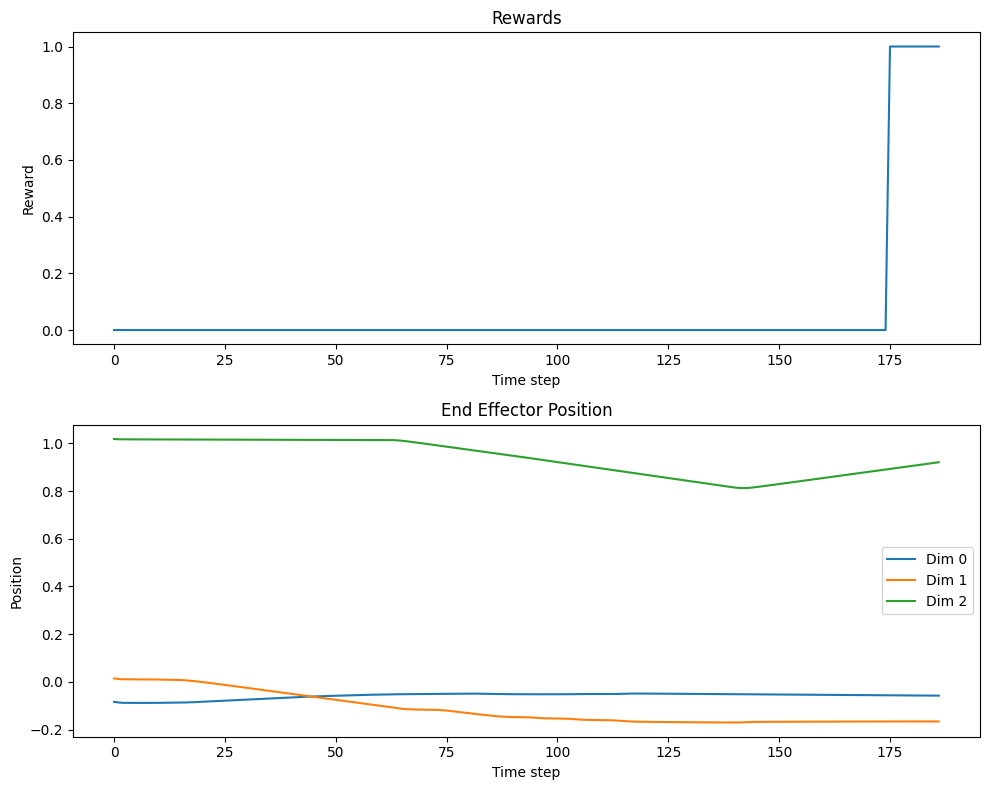

In [4]:
# Plot portion of the data
with h5py.File(file_path, 'r') as f:
    if 'data' in f:
        data_group = f['data']
        demo_keys = [k for k in data_group.keys() if k.startswith('demo_')]
        
        if demo_keys:
            demo = data_group[demo_keys[0]]
            
            fig, axs = plt.subplots(2, 1, figsize=(10, 8))
            
            # Plot rewards
            if 'rewards' in demo:
                rewards = demo['rewards'][:]
                axs[0].plot(rewards)
                axs[0].set_title('Rewards')
                axs[0].set_xlabel('Time step')
                axs[0].set_ylabel('Reward')
            
            # Plot end effector position if available
            if 'obs' in demo and 'robot0_eef_pos' in demo['obs']:
                eef_pos = demo['obs']['robot0_eef_pos'][:]
                
                # Plot each dimension separately
                for i in range(eef_pos.shape[1]):
                    axs[1].plot(eef_pos[:, i], label=f'Dim {i}')
                
                axs[1].set_title('End Effector Position')
                axs[1].set_xlabel('Time step')
                axs[1].set_ylabel('Position')
                axs[1].legend()
            
            plt.tight_layout()
            plt.show()



Found 2 image observations: ['agentview_image', 'robot0_eye_in_hand_image']


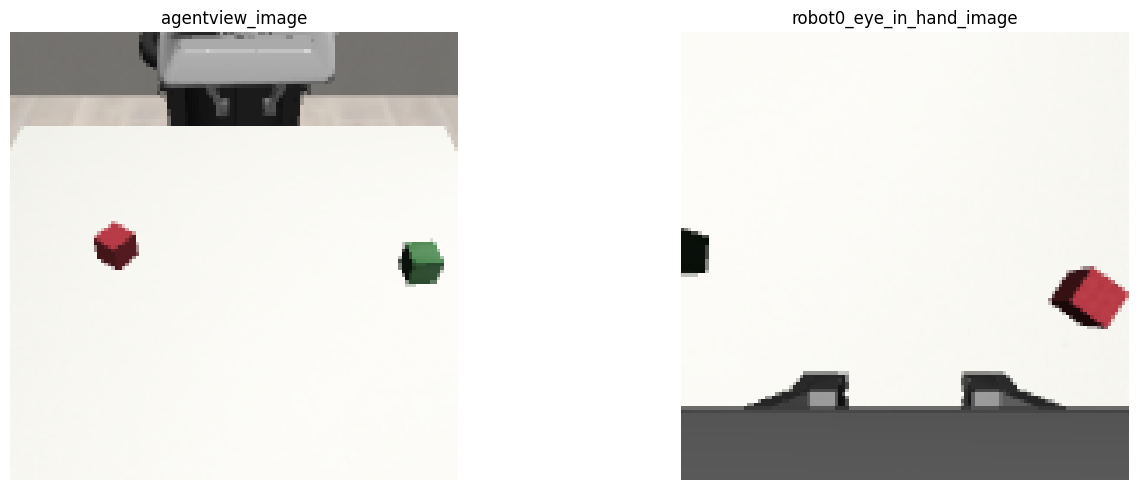

In [5]:
# Display images

with h5py.File(file_path, 'r') as f:
    if 'data' in f:
        data_group = f['data']
        demo_keys = [k for k in data_group.keys() if k.startswith('demo_')]
        
        if demo_keys:
            demo = data_group[demo_keys[0]]
            
            if 'obs' in demo:
                # Find image observations
                image_keys = [k for k in demo['obs'].keys() if 'image' in k or 'rgb' in k]
                
                if image_keys:
                    print(f"Found {len(image_keys)} image observations: {image_keys}")
                    
                    # Display the first image from each key
                    fig, axs = plt.subplots(1, len(image_keys), figsize=(15, 5))
                    if len(image_keys) == 1:
                        axs = [axs]  # Make it iterable
                    
                    for i, key in enumerate(image_keys):
                        img_data = demo['obs'][key][0]  # First image
                        axs[i].imshow(img_data)
                        axs[i].set_title(key)
                        axs[i].axis('off')
                    
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No image observations found")


### CHECKING tfds generation output

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

dataset_path = (
    "/home/dhanush/gaze_project/feb_test_data/tensorflow_datasets/robosuite/lift_either"
)
dataset = tf.data.experimental.load(dataset_path)
print("Dataset loaded!")

In [ ]:
# Examine the first trajectory
first_trajectory = next(iter(dataset))
print("\nFirst trajectory contains:")
for key, value in first_trajectory.items():
    if isinstance(value, tf.Tensor):
        print(f"  {key}: shape={value.shape}, dtype={value.dtype}")

# Count trajectories (optional, might be slow for large datasets)
trajectory_count = sum(1 for _ in dataset)
print(f"\nDataset contains {trajectory_count} trajectories")

# Example: Process each trajectory
total_rewards = []
for trajectory in dataset:
    reward = tf.reduce_sum(trajectory["rewards"]).numpy()
    total_rewards.append(reward)

print(f"\nAverage return: {np.mean(total_rewards):.4f}")
print(f"Min/Max return: {np.min(total_rewards):.4f}/{np.max(total_rewards):.4f}")

I0000 00:00:1740605183.850878  441477 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1900 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5


Dataset loaded!

First trajectory contains:
  discount: shape=(193,), dtype=<dtype: 'float32'>
  is_terminal: shape=(193,), dtype=<dtype: 'bool'>
  observations: shape=(193, 52), dtype=<dtype: 'float32'>
  rewards: shape=(193,), dtype=<dtype: 'float32'>
  is_last: shape=(193,), dtype=<dtype: 'bool'>
  actions: shape=(193, 7), dtype=<dtype: 'float32'>
  is_first: shape=(193,), dtype=<dtype: 'bool'>


2025-02-26 13:26:24.730980: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Dataset contains 50 trajectories

Average return: 12.0000
Min/Max return: 12.0000/12.0000


2025-02-26 13:26:25.405002: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# Take a look at the first few elements
print("\n=== First Element Structure ===")
for element in dataset.take(1):
    for key, value in element.items():
        if isinstance(value, tf.Tensor):
            print(f"{key}: shape={value.shape}, dtype={value.dtype}")
        else:
            print(f"{key}: {type(value)}")

# Check how many trajectories are in the dataset
print(f"\nNumber of trajectories: {len(list(dataset))}")

# Helper function to visualize a trajectory
def visualize_trajectory(trajectory):
    # Create a figure
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))
    
    # Plot robot end-effector position if available
    if "observations" in trajectory:
        obs = trajectory["observations"]
        # Assuming first 3 dimensions are end-effector position
        # This may need to be adjusted based on your actual observation space
        if obs.shape[1] >= 3:
            for i in range(3):
                axs[0].plot(obs[:, i], label=f'Dim {i}')
            axs[0].set_title('End Effector Position')
            axs[0].set_xlabel('Time step')
            axs[0].set_ylabel('Position')
            axs[0].legend(['X', 'Y', 'Z'])
    
    # Plot rewards
    if "rewards" in trajectory:
        axs[1].plot(trajectory["rewards"])
        axs[1].set_title('Rewards')
        axs[1].set_xlabel('Time step')
        axs[1].set_ylabel('Reward')
    
    # Plot actions (first 3 dimensions for visualization)
    if "actions" in trajectory:
        actions = trajectory["actions"]
        for i in range(min(3, actions.shape[1])):
            axs[2].plot(actions[:, i], label=f'Dim {i}')
        axs[2].set_title('Actions (first 3 dimensions)')
        axs[2].set_xlabel('Time step')
        axs[2].set_ylabel('Action value')
        axs[2].legend()
    
    plt.tight_layout()
    plt.show()

# Visualize a sample trajectory
for trajectory in dataset.take(1):
    visualize_trajectory(trajectory)

# If you want to convert to numpy arrays for further processing
def dataset_to_numpy(trajectory):
    numpy_traj = {}
    for key, value in trajectory.items():
        if isinstance(value, tf.Tensor):
            numpy_traj[key] = value.numpy()
    return numpy_traj

# Get one trajectory as numpy arrays
for trajectory in dataset.take(1):
    numpy_traj = dataset_to_numpy(trajectory)
    print("\n=== Numpy Trajectory ===")
    for key, value in numpy_traj.items():
        print(f"{key}: shape={value.shape}, dtype={value.dtype}")

# Example: compute statistics on all trajectories
def compute_dataset_stats(dataset):
    rewards = []
    traj_lengths = []
    
    for trajectory in dataset:
        if "rewards" in trajectory:
            rewards.append(tf.reduce_sum(trajectory["rewards"]).numpy())
            traj_lengths.append(trajectory["rewards"].shape[0])
    
    print(f"\n=== Dataset Statistics ===")
    print(f"Number of trajectories: {len(rewards)}")
    print(f"Average trajectory length: {np.mean(traj_lengths):.2f} steps")
    print(f"Average return: {np.mean(rewards):.4f}")
    print(f"Min return: {np.min(rewards):.4f}")
    print(f"Max return: {np.max(rewards):.4f}")

# Compute statistics (this might take a while for large datasets)
compute_dataset_stats(dataset)

### Conversion to TFDS with images

In [ ]:
# Try to read metadata
try:
    with open(f"{dataset_path}/snapshot.metadata", "r") as f:
        metadata = json.load(f)
    print("\nDataset metadata:")
    print(metadata)
except Exception as e:
    print(f"Could not read metadata: {e}")

# Examine structure
print("\n=== Dataset Structure Examination ===")
example_count = 0
all_keys = set()

# Look at first 3 examples to verify consistency
for trajectory in dataset.take(3):
    example_count += 1
    print(f"\nExample {example_count} keys: {list(trajectory.keys())}")
    
    # Collect all keys for detailed examination
    for key in trajectory.keys():
        all_keys.add(key)
        
        # For tensors, print shape and dtype
        if isinstance(trajectory[key], tf.Tensor):
            print(f"  {key}: shape={trajectory[key].shape}, dtype={trajectory[key].dtype}")
        # For dictionaries (like 'images'), print their structure
        elif isinstance(trajectory[key], dict):
            print(f"  {key} (dict):")
            for subkey, value in trajectory[key].items():
                print(f"    {subkey}: shape={value.shape}, dtype={value.dtype}")
                
# Deep check for possible image data by examining values
print("\n=== Deep Check for Image Data ===")
for trajectory in dataset.take(1):
    # Look at every tensor to see if it could be image data
    for key in trajectory.keys():
        if isinstance(trajectory[key], tf.Tensor):
            tensor = trajectory[key]
            # Check if this tensor might contain image data
            if len(tensor.shape) >= 3:  # At least 3D for images
                if tensor.shape[-1] in [1, 3, 4]:  # Common image channels
                    print(f"Potential image data in '{key}': shape={tensor.shape}, dtype={tensor.dtype}")
                    
                    # Try to visualize first element as image
                    try:
                        plt.figure(figsize=(6, 6))
                        img = tensor[0].numpy()
                        
                        # Normalize if needed
                        if img.dtype != np.uint8 and img.max() > 1.0:
                            img = (img / img.max() * 255).astype(np.uint8)
                        elif img.dtype != np.uint8 and img.max() <= 1.0:
                            img = (img * 255).astype(np.uint8)
                            
                        plt.imshow(img)
                        plt.title(f"Potential image from '{key}'")
                        plt.show()
                    except Exception as e:
                        print(f"  Could not visualize as image: {e}")
        
        # Check dictionary fields as well
        elif isinstance(trajectory[key], dict):
            for subkey, tensor in trajectory[key].items():
                if len(tensor.shape) >= 3 and tensor.shape[-1] in [1, 3, 4]:
                    print(f"Potential image data in '{key}/{subkey}': shape={tensor.shape}, dtype={tensor.dtype}")
                    
                    # Try to visualize
                    try:
                        plt.figure(figsize=(6, 6))
                        img = tensor[0].numpy()
                        plt.imshow(img)
                        plt.title(f"Image from '{key}/{subkey}'")
                        plt.show()
                    except Exception as e:
                        print(f"  Could not visualize as image: {e}")

print("\nDiagnostic check complete!")

### Commands used for conversion from the processed hdf5 file to TFDS format

Commands I used to run the conversion stuff :

~~~
python convert_robosuite_to_tfds.py \
  --data_dir /home/dhanush/gaze_project/gaze_rl/data/lift_dual/nov2024 \
  --dataset_file demo_1_proc_images.hdf5 \
  --env_name robosuite \
  --task lift_dual \
  --save_imgs \
  --image_keys agentview_image robot0_eye_in_hand_image \
  --obs_keys robot0_eef_pos robot0_eef_quat robot0_eef_quat_site robot0_gripper_qpos robot0_gripper_qvel robot0_joint_pos robot0_joint_vel object agentview_image robot0_eye_in_hand_image
~~~

```
python convert_robosuite_to_tfds.py \
  --data_dir /home/dhanush/gaze_project/gaze_rl/data/lift_dual/nov2024 \
  --dataset_file demo_1_proc_images.hdf5 \
  --env_name robosuite \
  --task lift_dual \
  --save_imgs \
  --image_keys robot0_eye_in_hand_image \
  --obs_keys robot0_eef_pos robot0_eef_quat robot0_gripper_qpos robot0_joint_pos object robot0_eye_in_hand_image
  --compute_subgoals
```
